<h1>Dask <b>Delayed</b></h1>

In [1]:
import time

In [2]:
def inc(x):
    time.sleep(1) # Sleep for 1 sec
    return x +1

def add(x, y):
    time.sleep(1) # Sleep for 1 sec
    return x + y

In [3]:
%%time

x = inc(1)
y = inc(2)

z = add(x, y)

CPU times: user 1.4 ms, sys: 0 ns, total: 1.4 ms
Wall time: 3 s


In [4]:
from dask import delayed

In [5]:
%%time

a = delayed(inc)(1)
b = delayed(inc)(2)

c = delayed(add)(a,b)

CPU times: user 1.31 ms, sys: 56 μs, total: 1.37 ms
Wall time: 1.92 ms


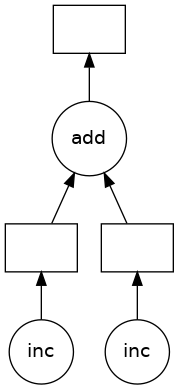

In [6]:
c.visualize()

In [7]:
c.compute()

5

<h1> Parallelizing a <b>for</b> loop with dask <b>delayed</d></h1>

In [9]:
data = list(range(8))

In [10]:
%%time

result = sum([inc(i) for i in data])
result

CPU times: user 0 ns, sys: 2.16 ms, total: 2.16 ms
Wall time: 8 s


36

In [15]:
%%time

result = [delayed(inc)(i) for i in data]

result = delayed(sum)(result)

CPU times: user 1.69 ms, sys: 107 μs, total: 1.79 ms
Wall time: 1.95 ms


CPU times: user 3.03 ms, sys: 0 ns, total: 3.03 ms
Wall time: 35.4 ms


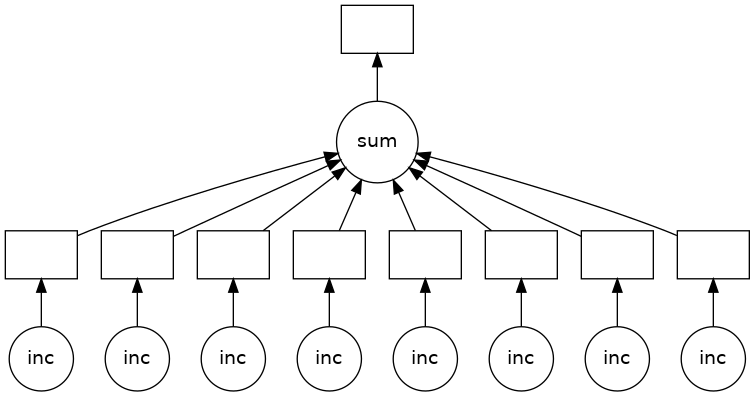

In [16]:
%%time

result.visualize()

In [17]:
%%time

result.compute()

CPU times: user 4.48 ms, sys: 0 ns, total: 4.48 ms
Wall time: 2 s


36

### Use of `@delayed` syntax as a decorator

In [25]:
# Parrellize the inc and add functions with dask delayed

@delayed
def inc(x):
    time.sleep(1)
    return x + 1

@delayed
def add(x, y):
    time.sleep(1)
    return x + y

@delayed                    
def double(x):
    """Decrease x by one"""
    time.sleep(1)
    return 2*x 

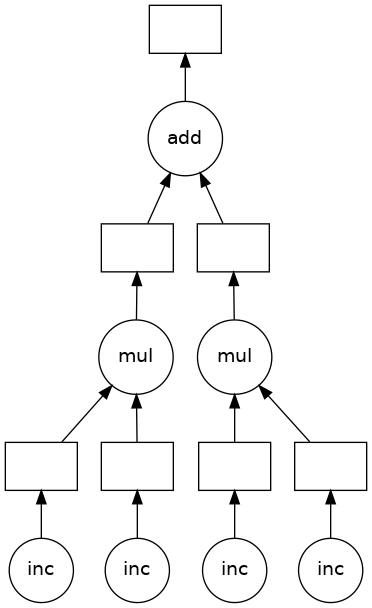

In [20]:
result = (inc(5) * inc(7)) + (inc(6) * inc(3))
result.visualize()

In [21]:
%%time
result.compute()

CPU times: user 2.38 ms, sys: 560 μs, total: 2.94 ms
Wall time: 1 s


76

In [29]:
 # Without delayed
def inc_(x):
    time.sleep(1)
    return x + 1

def double_(x):
    time.sleep(1)
    return x**2

def add_(x, y):
    time.sleep(1)
    return x + y

In [24]:
%%time
result_ = (inc_(5) * inc_(7)) + (inc_(6) * inc_(3))
result_

CPU times: user 1.59 ms, sys: 63 μs, total: 1.65 ms
Wall time: 4 s


76

In [26]:
%%time
output = []

for x in range(8):
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

result = delayed(sum)(output)

CPU times: user 2.04 ms, sys: 227 μs, total: 2.27 ms
Wall time: 2.95 ms


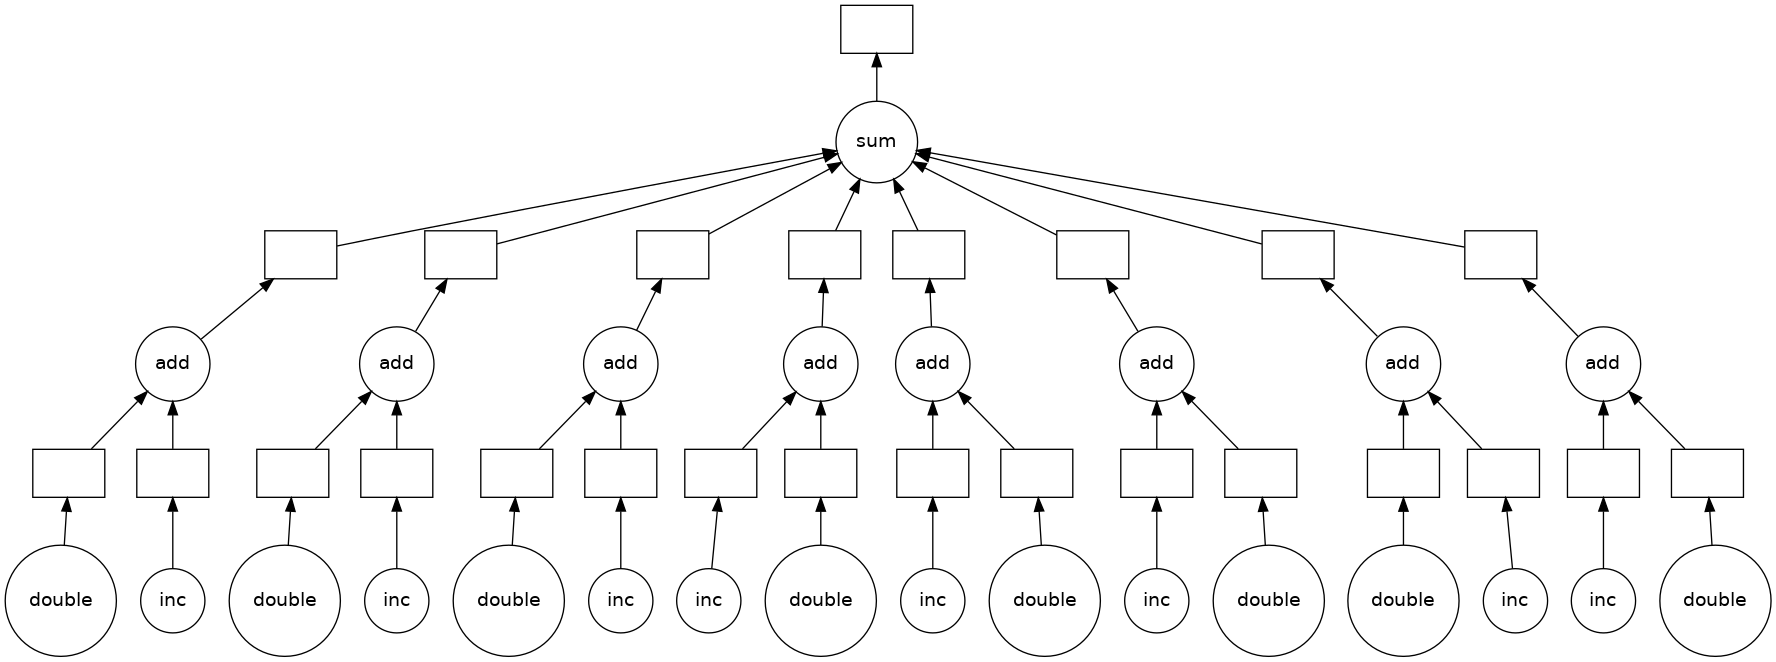

In [27]:
result.visualize()

In [28]:
%%time

result.compute()

CPU times: user 7.37 ms, sys: 171 μs, total: 7.54 ms
Wall time: 5.01 s


92

In [30]:
%%time

# Now without dask
output = []
for i in range(8):
    a = inc_(i)
    b = double_(i)
    c = add_(a, b)
    output.append(c)

total = sum(output)

CPU times: user 2.56 ms, sys: 344 μs, total: 2.91 ms
Wall time: 24 s
